# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: /content/Bus_Breakdown_and_Delays.csv
100% 34.4M/34.4M [00:00<00:00, 164MB/s]


In [131]:
df=pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

## Importing Libraries

In [128]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix


## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

# **Inspect the dataset**

In [4]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


# **Dataset structure**

In [7]:
df.shape#21 column and 147972 row

(147972, 21)

In [5]:
df.info()#some value may need to fix their datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

# **Summary statistics**

In [72]:
df.describe()

,Busbreakdown_ID,How_Long_Delayed,Number_Of_Students_On_The_Bus
count,1.479720e+05,125849.000000,147972.000000
mean,1.287779e+06,30.012873,3.590071
std,4.324338e+04,628.780313,55.365859
min,1.212681e+06,0.000000,0.000000
25%,1.250438e+06,15.000000,0.000000
50%,1.287844e+06,20.000000,0.000000
75%,1.325191e+06,30.000000,4.000000
max,1.362605e+06,202340.000000,9007.000000


In [9]:
df['Breakdown_or_Running_Late'].value_counts()

,count
Breakdown_or_Running_Late,
Running Late,130857
Breakdown,17115


# **Check for missing values and dublication**

In [32]:
df.isnull().sum()
#need to drop Incident_Number	 too many null values

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [26]:
df.duplicated().sum()

35

# **Distribution of features**

<ipython-input-11-c86e0c5dca56>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Running Late','Breakdown '])


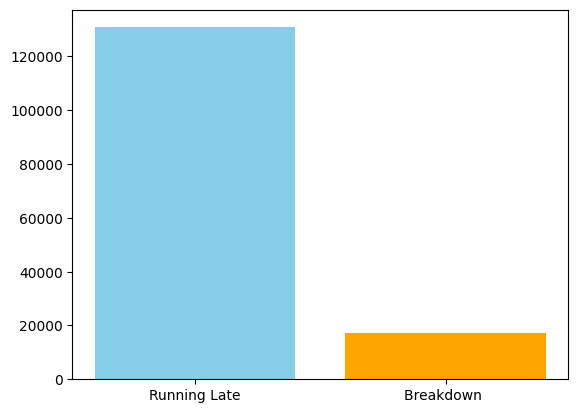

In [11]:
#plot value count for Breakdown_or_Running_Late

seniot_counts=df['Breakdown_or_Running_Late'].value_counts()

fig, ax = plt.subplots()
ax.bar(seniot_counts.index,seniot_counts.values,color=['skyblue','orange'])
ax.set_xticklabels(['Running Late','Breakdown '])
ax.set_xticks([0,1])

plt.show()

#**Correlation matrix**

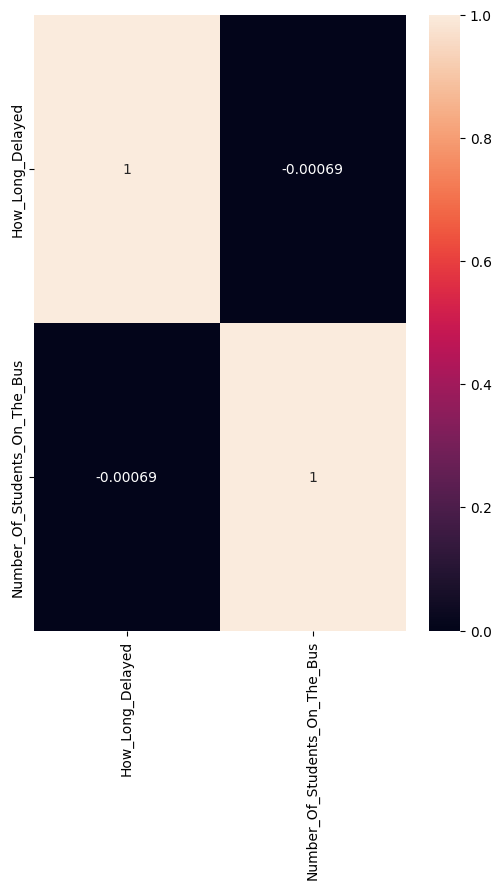

In [73]:
#plot corr between numiric value

numiric_value=df[['How_Long_Delayed','Number_Of_Students_On_The_Bus']].corr()

plt.figure(figsize=(6,8))
sns.heatmap(numiric_value,annot=True)
plt.show()
#there is no strong relationship between numiric feauture

# **Outlier detection**

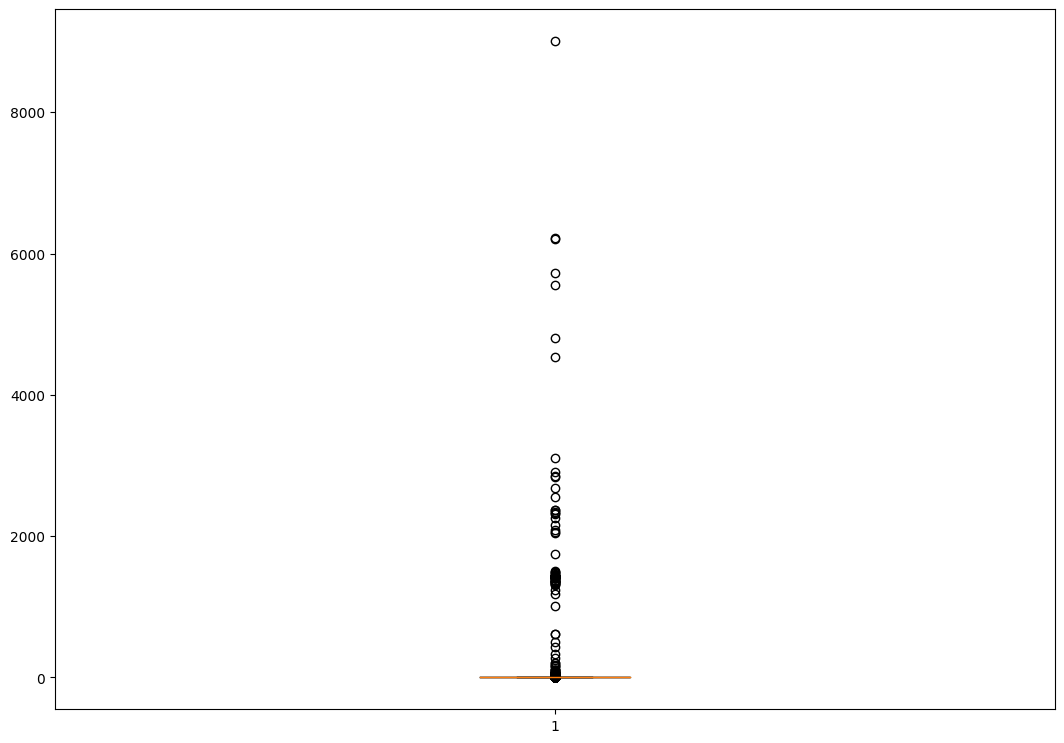

In [12]:
# plot to detect outlier

numiric_value=df[['Number_Of_Students_On_The_Bus']]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(numiric_value)
plt.show()#no outlier

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

# **Feature Engineering**

In [132]:
df['Occurred_On']=pd.to_datetime(df['Occurred_On'])
df['Created_On']=pd.to_datetime(df['Created_On'])
df['Informed_On']=pd.to_datetime(df['Informed_On'])
df['Last_Updated_On']=pd.to_datetime(df['Last_Updated_On'])

In [60]:
df['How_Long_Delayed']

,How_Long_Delayed
0,10MINUTES
1,25 MINUTES
2,15 MINUTES
3,10 minutes
4,10MINUTES
...,...
147967,15-20
147968,20 MINS
147969,20-25MINS
147970,NaN


In [133]:
df['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('MINUTES',' ').str.strip().str.extract('(\d+)').astype(float)

#**Handle Outliers**

Remove outliers
Transform outliers

In [134]:
def remove_outlier(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outlier(df,'Number_Of_Students_On_The_Bus')

#**Handle Missing Values**

Impute missing values or drop them.

In [135]:
#first drop unnecessary columns

df=df.drop('Busbreakdown_ID',axis=1)
df=df.drop('Incident_Number',axis=1)#too many null values to handle

In [136]:
#handle missing values:

df.replace(' ', pd.NA, inplace=True)#error appear because of " " so used this
remove_unknown_other_na=df.columns
for column in remove_unknown_other_na:
    mode_value = df[column].replace(['Unknown', 'na', 'Other'], pd.NA).mode()[0]
    df[column] = df[column].replace(['Unknown', 'na', 'Other'], mode_value).fillna(mode_value)#the goal of this to handel any null or spaces or rendom words

In [95]:
df.isnull().sum()#no missing value

,0
School_Year,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0
Bus_Company_Name,0


In [97]:
df.sample(5)

,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
69891,2016-2017,Pre-K/EI,0716,4,Heavy Traffic,C814,2016-10-06 07:10:00,2016-10-06 07:10:00,Bronx,"G.V.C., LTD.",30.0,5,Yes,Yes,No,2016-10-06 07:10:00,2016-10-06 07:10:21,Running Late,Pre-K
132627,2016-2017,Special Ed AM Run,1346,M137,Heavy Traffic,03417,2017-06-01 06:22:00,2017-06-01 06:22:00,Manhattan,LEESEL TRANSP CORP (B2192,20.0,0,Yes,Yes,No,2017-06-01 06:22:00,2017-06-01 06:22:45,Running Late,School-Age
54225,2015-2016,Pre-K/EI,9307,3,Heavy Traffic,C195,2016-06-10 07:34:00,2016-06-10 07:41:00,Bronx,"G.V.C., LTD.",20.0,6,Yes,Yes,No,2016-06-10 07:41:00,2016-06-10 07:41:30,Running Late,Pre-K
45927,2015-2016,General Ed AM Run,344,X2103,Heavy Traffic,"11111,11378",2016-05-06 06:45:00,2016-05-06 06:49:00,Bronx,"GRANDPA`S BUS CO., INC.",20.0,0,Yes,Yes,No,2016-05-06 06:49:00,2016-05-06 06:49:15,Breakdown,School-Age
107424,2016-2017,Pre-K/EI,9003,B0941A,Heavy Traffic,E052A,2017-03-09 07:15:00,2017-03-09 07:32:00,Brooklyn,L & M BUS CORP.,15.0,4,Yes,Yes,Yes,2017-03-09 07:32:00,2017-03-09 07:32:10,Running Late,Pre-K


#**Remove Duplicates**

Remove redundant or duplicate data

In [137]:
df=df.drop_duplicates()

In [138]:
df.duplicated().sum()

0

#**Scale and Normalize Data**

Standardization (Z-score)
Min-Max scaling

In [139]:
scaler = StandardScaler()
df[['How_Long_Delayed', 'Number_Of_Students_On_The_Bus']] = scaler.fit_transform(df[['How_Long_Delayed', 'Number_Of_Students_On_The_Bus']])

In [140]:
df[['How_Long_Delayed', 'Number_Of_Students_On_The_Bus']].sample()

,How_Long_Delayed,Number_Of_Students_On_The_Bus
18200,-0.023297,1.173547


#**Encode Categorical Variables**

One-hot encoding
Label encoding



In [141]:
le=LabelEncoder()

encoded_label=['Has_Contractor_Notified_Schools','Has_Contractor_Notified_Parents','Have_You_Alerted_OPT','Breakdown_or_Running_Late','School_Age_or_PreK']

for i in encoded_label:
  df[i]=le.fit_transform(df[i])

In [106]:
df[['Has_Contractor_Notified_Schools','Has_Contractor_Notified_Parents','Have_You_Alerted_OPT','Breakdown_or_Running_Late','School_Age_or_PreK']].sample()

,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
22266,1,1,1,1,1


In [110]:
df.sample()

,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
110811,2016-2017,Special Ed AM Run,458,N089,Heavy Traffic,75887,2017-03-20 07:13:00,2017-03-20 07:14:00,Nassau County,LOGAN BUS COMPANY INC.,0.000148,0.0,1,1,0,2017-03-20 07:14:00,2017-03-20 07:14:14,1,1


#**Feature selection**

In [142]:
df=df[['How_Long_Delayed','Number_Of_Students_On_The_Bus','Has_Contractor_Notified_Schools','Has_Contractor_Notified_Parents','Have_You_Alerted_OPT','Breakdown_or_Running_Late','School_Age_or_PreK']]

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [143]:

x=df.drop('Breakdown_or_Running_Late',axis=1)
y=df['Breakdown_or_Running_Late']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

smot=SMOTE(random_state=42)#over sampling minority class

x_train,y_train=smot.fit_resample(x_train,y_train)#fit to train because we want the model to learn and be biased toward majority class

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [144]:
model_ann = models.Sequential([
    layers.Dense(units=128,activation='relu',input_dim=x_train.shape[1],name='layer1'),
    layers.Dropout(0.7),
    layers.Dense(units=64,activation='relu',name='layer2'),
    layers.Dropout(0.7),
    layers.Dense(units=32,activation='relu',name="layer3"),
    layers.Dropout(0.7),
    layers.Dense(units=1,activation='sigmoid',name='outputlayer')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [116]:
model_ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                       │ (None, 128)                 │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer3 (Dense)                       │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputlayer (Dense)                  │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,265 (44.00 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [145]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)#to prevent ovefitting

model_ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [146]:
history=model_ann.fit(x_train,y_train,batch_size=20,epochs=100,callbacks=early_stopping,validation_split=0.2,verbose=2)

Epoch 1/100
7911/7911 - 22s - 3ms/step - accuracy: 0.6476 - loss: 0.6131 - val_accuracy: 0.4851 - val_loss: 0.7124
Epoch 2/100
7911/7911 - 40s - 5ms/step - accuracy: 0.7217 - loss: 0.5077 - val_accuracy: 0.8700 - val_loss: 0.5862
Epoch 3/100
7911/7911 - 18s - 2ms/step - accuracy: 0.7521 - loss: 0.4668 - val_accuracy: 0.9550 - val_loss: 0.5132
Epoch 4/100
7911/7911 - 21s - 3ms/step - accuracy: 0.7765 - loss: 0.4278 - val_accuracy: 0.9850 - val_loss: 0.4520
Epoch 5/100
7911/7911 - 18s - 2ms/step - accuracy: 0.7854 - loss: 0.4096 - val_accuracy: 0.9798 - val_loss: 0.4826
Epoch 6/100
7911/7911 - 20s - 2ms/step - accuracy: 0.7902 - loss: 0.4021 - val_accuracy: 0.9890 - val_loss: 0.4150
Epoch 7/100
7911/7911 - 21s - 3ms/step - accuracy: 0.7964 - loss: 0.3918 - val_accuracy: 0.9862 - val_loss: 0.4205
Epoch 8/100
7911/7911 - 18s - 2ms/step - accuracy: 0.7971 - loss: 0.3939 - val_accuracy: 0.9789 - val_loss: 0.4882
Epoch 9/100
7911/7911 - 21s - 3ms/step - accuracy: 0.8010 - loss: 0.3856 - val_a

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [160]:
y_pred=(model_ann.predict(x_test)>0.55).astype("int32")
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

877/877 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       0.35      1.00      0.52      3366
           1       1.00      0.75      0.86     24687

    accuracy                           0.78     28053
   macro avg       0.68      0.87      0.69     28053
weighted avg       0.92      0.78      0.82     28053

[[ 3350    16]
 [ 6098 18589]]


## Make Predictions
Use the trained model to make predictions on new or unseen data.

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

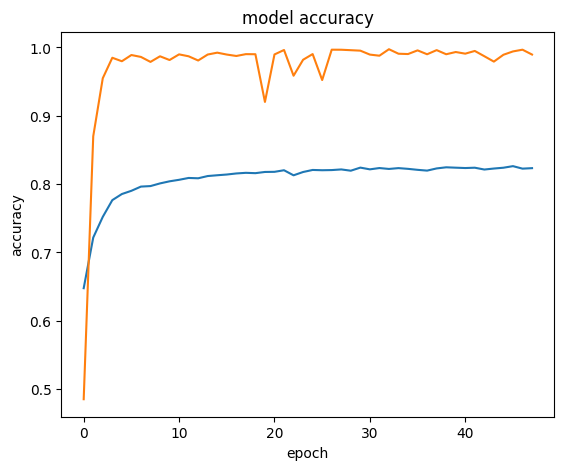

In [153]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

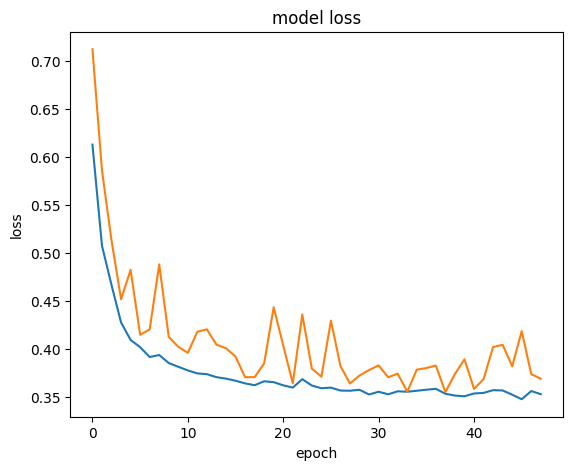

In [157]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

## Save the Model
Save the trained model for submission.

In [158]:
model_ann.save('weekly_5_ann.keras')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

1- did not need id column and drop Incident_Number because too many value
  have to fix outlier
  How_Long_Delayed have to fix its data type
  scaler = StandardScaler() < when i did not use it it affected my model performance

  le=LabelEncoder() < for model to process it

  smot=SMOTE(random_state=42)#over sampling minority class



2 i face an overfitting so i used dropout
  i used sigmoid because binary classification



3-  wanted the model to train on 20 batch each
    number of epoch is 100 and put early stopping if model did not progress will stop if needed more training will go through 100 epoch

4- i choose binary_crossentropy because i have two classes
  metrics i choose accuracy because i want to show accuracy

5 i choose dropout and i run the midel many time until it chow less overfitting at 0.7

6 classification_report and confusion_matrix to be able to see what the model have predicted of each calss

precision for class 1 is very high and predict corrctly
recall for class 0  is very high and predict corrctly




